# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Lists to hold data frame variables
temp_max = []
humidity = []
clouds = []
latitude = []
longitude = []
wind_speed = []
city_name = []
country = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=800)
lngs = np.random.uniform(low=-180.000, high=180.000, size=800)
lat_lngs = zip(lats, lngs)
print(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
        city = city.replace(' ','%20')
        query_url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + api_key + "&units=imperial"
        print(query_url)
        
        response = requests.get(f'{query_url}').json()
        response

        temp_max.append(response['main']['temp_max'])
        temp_max

        humidity.append(response['main']['humidity'])
        humidity

        clouds.append(response['clouds']['all'])
        clouds

        wind_speed.append(response['wind']['speed'])
        wind_speed
        
        latitude.append(response['coord']['lat'])
        latitude
        
        longitude.append(response['coord']['lon'])
        longitude
        
        city_name.append(response['name'])
        city
        
        country.append(response['sys']['country'])
        country

        
        time.sleep(2.01)
        
# Print the city count to confirm sufficient count
len(cities)

[ 85.11100329 -80.9811886   67.09875867  24.97460897  59.29561078
 -45.06264953 -29.21872504 -43.70214036   3.79203059 -69.18493462
 -70.1847379  -45.75405215  46.52894496 -88.0674584   70.07452481
  53.57290326  17.24207391  42.97479698  64.84750469 -49.15026132
 -13.36689234  38.82828101 -68.52954704  86.0395324  -39.32347221
   1.86685088 -28.52013774  60.60066672  14.9440167  -89.31586445
  15.68437734 -40.59727718  24.8221449   60.31559135 -89.99595505
 -37.37476784  71.09717723 -15.09969829  67.56942113  60.52329093
 -59.26909165  12.35841884 -80.88914458 -25.27271887 -64.21432435
  57.18700262 -84.32766087  18.25824614  -0.94488349 -76.9343375
  64.7440691  -30.89455643  50.0627491  -87.93737129  24.33092481
  12.40559398  69.47673939  -4.05442858  76.8828185    4.97848586
 -58.40483425  48.7913909   55.00506874  48.72706787  85.16997585
 -15.8526416   37.15254058  19.49581515  70.27576791 -43.34657263
 -72.78647485 -75.81876708  -9.49020699 -14.99054597 -36.34154674
 -61.271007

http://api.openweathermap.org/data/2.5/weather?q=bluff&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=kiruna&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=panaba&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=stromness&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=castro&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=carnarvon&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=lodwar&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=busselton&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial
h

KeyError: 'main'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
### Convert Raw Data to DataFrame
weather_data = {'Max Temperature': temp_max, 'Humidity': humidity, 'Cloudiness': clouds, 'Wind Speed': wind_speed, 'City Name': city_name, 'Country': country, 'Latitude': latitude, 'Longitude': longitude}
weather_data_df = pd.DataFrame(weather_data)
weather_data_df.head()

#* Export the city data into a .csv.

#* Display the DataFrame

,Max Temperature,Humidity,Cloudiness,Wind Speed,City Name,Country,Latitude,Longitude
0,14.00,72,20,10.29,Longyearbyen,NO,78.22,15.63
1,70.50,79,71,5.28,Bluff,AU,-23.58,149.07
2,3.20,84,0,3.36,Kiruna,SE,67.86,20.23
3,79.72,74,20,11.97,Panaba,MX,21.28,-88.27
4,41.00,52,75,16.11,Stromness,CA,42.87,-79.55


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

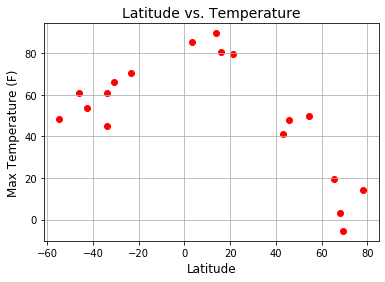

In [13]:
# Scatterplot 1
plt.scatter(weather_data_df["Latitude"], weather_data_df["Max Temperature"], color = "r", marker="o")

plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.title("Latitude vs. Temperature", fontsize=14)
plt.grid(True)

plt.show()
#plt.savefig("Latitude_vs_Temperature.png")

#### Latitude vs. Humidity Plot

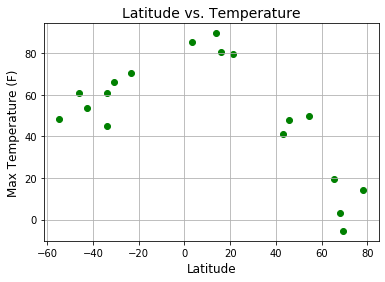

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Max Temperature"], color = "g", marker="o")

plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.title("Latitude vs. Temperature", fontsize=14)
plt.grid(True)

plt.show()
plt.savefig("lat_vs_hum.png")

#### Latitude vs. Cloudiness Plot

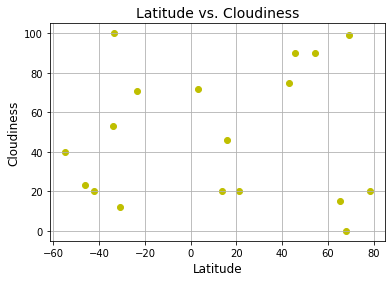

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"], color = "y", marker="o")

plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness", fontsize=12)
plt.title("Latitude vs. Cloudiness", fontsize=14)
plt.grid(True)

plt.show()
plt.savefig("lat_vs_cloud.png")

#### Latitude vs. Wind Speed Plot

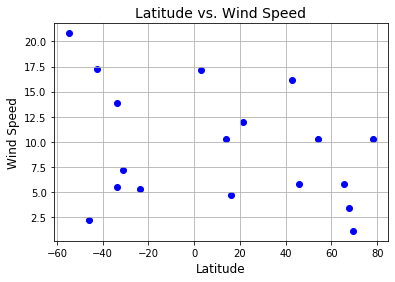

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], color = "b", marker="o")

plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed", fontsize=12)
plt.title("Latitude vs. Wind Speed", fontsize=14)
plt.grid(True)

plt.show()
plt.savefig("lat_vs_wind.png")